0.01410473987697575
0.014104739185602152
0.014104739367147037
0.014104740564581853
0.014104738911913923
0.014104739063634238
0.01410474061457256
0.014104739384187213
0.014104739312749552


[]

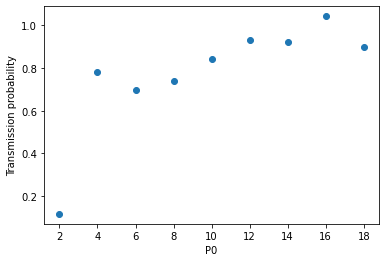

In [10]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
from itertools import count
from scipy.integrate import simps

delta = 0.1
L = 30.
N = 100
dimension = 2*N + 1 # Number of lattice points.
x = np.linspace(-L,L,2*N+1)

l=1
V0=-20   ## energy scale expressed in terms of this
hbar=6.58*(10)**(-16)
m=9.1*(10)**(-31)
E0=hbar**2/(2*m*(l**2))   ## Energy scale



def V(z):
    if abs(z)<=l:
        return V0/E0
    else:
        return 0
def kronecker(i,j):
    return 1 if i==j else 0
def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(i*delta) * kronecker(i,j)


a = 4   ## Initial spread in units of l0
b = -5    ## Initial peak of the Gaussian

def psi0(y):
        return (1/pow(np.pi*(a**2),0.25))*np.exp(-((y-b)**2)/(2.0*a**2) - 1j*p0*y)

Pi=[]
Ti=[]
for k in range(1,10):
    p0=2*k
    ###### The initial Gaussian wavefunction ##########
    H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
    H_eigenvalues, H_eigenvectors = lin.eig(H)
    idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
    H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
    H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors


    
    Psi0 = np.sqrt(delta)*np.array( [psi0(delta*i) for i in range(-N,N+1)], 'complex' )
    
    def Psi(t):
        
        sum = np.zeros(dimension, 'complex')
        for n in range(dimension):
            c = np.vdot(Psi0, H_eigenvectors[:,n]) # nth expansion coefficient
            E = H_eigenvalues[n]
            sum += c * np.exp(-E*t*1.0j) * H_eigenvectors[:,n]
        return sum

    def Prob(t):
        return np.array( [abs(Psi(t)[i])**2 for i in range(dimension)] )
    print(max(Prob(0)))
    potential =0.01*np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points
    
    
    Tn=[]
    xn=[]
    for i in x:
        if i>1:
            ind=np.where(x==i)
            Tn.append(Prob(1)[ind][0])
            xn.append(i)
  
    ProbT = simps(Tn,x=xn)
    Pi.append(p0)
    
    TotProb=simps(Prob(7*delta),x=x)
    Transmision=(ProbT/TotProb)
    Ti.append(Transmision)
    
plt.scatter(Pi,Ti)
plt.xlabel("P0")
plt.ylabel("Transmission probability")

plt.plot()

  
   






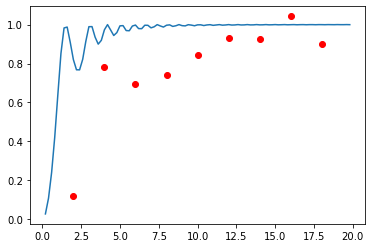

In [11]:
from numpy import *
from numpy import linalg as lin
import matplotlib.pyplot as plt
from itertools import count
from scipy.integrate import simps


l=1
V0=20   ## energy scale expressed in terms of this
hbar=6.58*(10)**(-16)
m=9.1*(10)**(-31)



def theory(x):
    E=x**2/2
    k1=(V0/(E*(E+V0)))
    k2=(sin((2*2/hbar)*(2*m*(E+V0))**0.5))**2

    return 1/(1+k1*k2)
Ypl=[]
Xpl=[]
for i in range(1,100):
    pi=i/5
    y=theory(pi)
    Ypl.append(y)
    Xpl.append(pi)
    
    
plt.plot(Xpl,Ypl)
plt.scatter(Pi,Ti,color="red")
plt.show()
   
